lionel_messi: 36it [00:01, 27.94it/s]
maria_sharapova: 34it [00:00, 49.66it/s]
roger_federer: 28it [00:00, 81.97it/s]
serena_williams: 29it [00:00, 77.51it/s]
virat_kohli: 41it [00:00, 101.43it/s]


Epoch 1/40
1/1 [==============================] - 11s 11s/step - loss: 1.6092 - accuracy: 0.2250 - val_loss: 3.4672 - val_accuracy: 0.1429
Epoch 2/40
1/1 [==============================] - 3s 3s/step - loss: 2.5823 - accuracy: 0.2667 - val_loss: 2.9475 - val_accuracy: 0.0000e+00
Epoch 3/40
1/1 [==============================] - 3s 3s/step - loss: 2.5081 - accuracy: 0.2750 - val_loss: 1.7901 - val_accuracy: 0.1429
Epoch 4/40
1/1 [==============================] - 3s 3s/step - loss: 2.2102 - accuracy: 0.2667 - val_loss: 1.5054 - val_accuracy: 0.2857
Epoch 5/40
1/1 [==============================] - 3s 3s/step - loss: 1.9125 - accuracy: 0.1750 - val_loss: 1.5137 - val_accuracy: 0.2857
Epoch 6/40
1/1 [==============================] - 3s 3s/step - loss: 1.5967 - accuracy: 0.2250 - val_loss: 1.7467 - val_accuracy: 0.1429
Epoch 7/40
1/1 [==============================] - 2s 2s/step - loss: 1.6255 - accuracy: 0.2333 - val_loss: 1.9096 - val_accuracy: 0.1429
Epoch 8/40
1/1 [===================

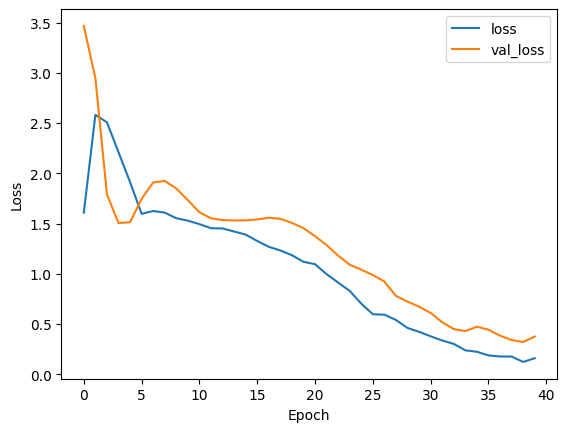

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm

# Define the directory paths and load the images
image_dir='cropped/'
lionel_messi_images=os.listdir(image_dir+ '/lionel_messi')
maria_sharapova_images=os.listdir(image_dir+ '/maria_sharapova')
roger_federer_images=os.listdir(image_dir+ '/roger_federer')
serena_williams_images=os.listdir(image_dir+ '/serena_williams')
virat_kohli_images=os.listdir(image_dir+ '/virat_kohli')

dataset = []
label = []
img_siz= (128, 128)

# Loop through each celebrity folder
for i , image_name in tqdm(enumerate(lionel_messi_images),desc="lionel_messi"):
    if(image_name.split('.')[1]=='png'):
        image=cv2.imread(image_dir+'/lionel_messi/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize(img_siz)
        dataset.append(np.array(image))
        label.append(0)

for i , image_name in tqdm(enumerate(maria_sharapova_images),desc="maria_sharapova"):
    if(image_name.split('.')[1]=='png'):
        image=cv2.imread(image_dir+'/maria_sharapova/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize(img_siz)
        dataset.append(np.array(image))
        label.append(1)
for i , image_name in tqdm(enumerate(roger_federer_images),desc="roger_federer"):
    if(image_name.split('.')[1]=='png'):
        image=cv2.imread(image_dir+'/roger_federer/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize(img_siz)
        dataset.append(np.array(image))
        label.append(2)
for i , image_name in tqdm(enumerate(serena_williams_images),desc="serena_williams"):
    if(image_name.split('.')[1]=='png'):
        image=cv2.imread(image_dir+'/serena_williams/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize(img_siz)
        dataset.append(np.array(image))
        label.append(3)
for i , image_name in tqdm(enumerate(virat_kohli_images),desc="virat_kohli"):
    if(image_name.split('.')[1]=='png'):
        image=cv2.imread(image_dir+'/virat_kohli/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize(img_siz)
        dataset.append(np.array(image))
        label.append(4)



# Convert lists to numpy arrays
dataset = np.array(dataset)
label = np.array(label)

# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=42)

# Normalize the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Model creation
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # Adjusted to 5 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Adjusted loss function for sparse labels
              metrics=['accuracy'])

# Model training
history = model.fit(x_train, y_train, epochs=40, batch_size=128, validation_split=0.1)

# Plot accuracy and loss
plt.plot(history.epoch, history.history['accuracy'], label='accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.savefig('celebrity_image_sample_accuracy_plot.png')
plt.clf()

plt.plot(history.epoch, history.history['loss'], label='loss')
plt.plot(history.epoch, history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.savefig('image_sample_loss_plot.png')

# Model evaluation
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {round(accuracy * 100, 2)}')

# Predictions
y_pred = model.predict(x_test)
predicted_labels = np.argmax(y_pred, axis=1)

# Classification report
print('Classification Report\n', classification_report(y_test, predicted_labels))


In [22]:
def predict_celebrity(image_path, model):
    celebrities = ['lionel_messi', 'maria_sharapova', 'roger_federer', 'serena_williams', 'virat_kohli']

    img_size = (128, 128)
    image = cv2.imread(image_path)
    image = Image.fromarray(image, 'RGB')
    image = image.resize(img_size)
    image = np.array(image)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    image = tf.keras.utils.normalize(image, axis=1)
    
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)
    celebrity = celebrities[predicted_label]
    
    return celebrity


In [28]:
new_image_path = r'C:\Users\Admin\Desktop\dlassignment\cropped\virat_kohli\virat_kohli5.png'
predicted_celebrity = predict_celebrity(new_image_path, model)
print(f'The predicted celebrity is: {predicted_celebrity}')

1/1 [==============================] - 0s 223ms/step
The predicted celebrity is: virat_kohli
